<a href="https://colab.research.google.com/github/parkrye/Python/blob/main/Spark_SQL_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark 환경 설치

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

#Spark 환경 설정

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

import findspark
findspark.init()
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

In [3]:
conf = SparkConf().setAppName('myApp1').setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

#실습

## SQL

In [4]:
emp_df = spark.read.format('csv').option('header','true').option('interSchema', 'true').load('/content/emp.csv')
dept_df = spark.read.format('csv').option('header','true').option('interSchema', 'true').load('/content/dept.csv')

In [6]:
dfEmp_view = emp_df.createOrReplaceTempView('dfEmp_view')
dfDept_view = dept_df.createOrReplaceTempView('dfDept_view')

In [7]:
query = '''
  select *
  from dfEmp_view
'''

spark.sql(query).show()

+-----+------+---------+----+----------+----+----+------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|
+-----+------+---------+----+----------+----+----+------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250|1400|    30|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500|   0|    30|
| 7876| ADAMS|    CLERK|7788|1987-05-23|1100|null|    20|
| 7900| JAMES|    CLERK|7698|1981-12-03| 950|null|    30|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|
| 9292|  JACK|

In [8]:
query = '''
  select *
  from dfDept_view
'''

spark.sql(query).show()

+------+----------+--------+
|deptno|     dname|     loc|
+------+----------+--------+
|    10|ACCOUNTING|NEW YORK|
|    20|  RESEARCH|  DALLAS|
|    30|     SALES| CHICAGO|
|    40|OPERATIONS|  BOSTON|
+------+----------+--------+



In [9]:
empDeptJoin_view = emp_df.join(dept_df, emp_df['deptno'] == dept_df['deptno'])
empDeptJoin_view.show()

+-----+------+---------+----+----------+----+----+------+------+----------+--------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|deptno|     dname|     loc|
+-----+------+---------+----+----------+----+----+------+------+----------+--------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|    20|  RESEARCH|  DALLAS|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|    30|     SALES| CHICAGO|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|    30|     SALES| CHICAGO|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|    20|  RESEARCH|  DALLAS|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250|1400|    30|    30|     SALES| CHICAGO|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|    30|     SALES| CHICAGO|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|    10|ACCOUNTING|NEW YORK|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|    20|  RESEARCH|  DALLAS|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|    10|A

In [18]:
query = '''
  select *
  from dfEmp_view, dfDept_view
  where dfEmp_view.deptno = dfDept_view.deptno
'''

viewEmpDeptJoin = spark.sql(query)
viewEmpDeptJoin.show()

+-----+------+---------+----+----------+----+----+------+------+----------+--------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|deptno|     dname|     loc|
+-----+------+---------+----+----------+----+----+------+------+----------+--------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|    20|  RESEARCH|  DALLAS|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|    30|     SALES| CHICAGO|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|    30|     SALES| CHICAGO|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|    20|  RESEARCH|  DALLAS|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250|1400|    30|    30|     SALES| CHICAGO|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|    30|     SALES| CHICAGO|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|    10|ACCOUNTING|NEW YORK|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|    20|  RESEARCH|  DALLAS|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|    10|A

In [31]:
viewEmpDeptJoin.createOrReplaceTempView('DeptJoin_view')

query = '''
  select *
  from DeptJoin_view
  where loc = 'NEW YORK'
'''

spark.sql(query).show()

+-----+------+---------+----+----------+----+----+------+------+----------+--------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|deptno|     dname|     loc|
+-----+------+---------+----+----------+----+----+------+------+----------+--------+
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|    10|ACCOUNTING|NEW YORK|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|    10|ACCOUNTING|NEW YORK|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|    10|ACCOUNTING|NEW YORK|
+-----+------+---------+----+----------+----+----+------+------+----------+--------+



In [35]:
query_sub = '''
  select *
  from dfEmp_view
  where deptno = (
    select deptno
    from dfDept_view
    where loc = 'NEW YORK'
  )
'''

spark.sql(query_sub).show()

+-----+------+---------+----+----------+----+----+------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|
+-----+------+---------+----+----------+----+----+------+
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|
+-----+------+---------+----+----------+----+----+------+



In [36]:
spark.sql(query_sub).explain()

== Physical Plan ==
*(1) Filter (isnotnull(deptno#23) AND (deptno#23 = Subquery scalar-subquery#386, [id=#248]))
:  +- Subquery scalar-subquery#386, [id=#248]
:     +- *(1) Project [deptno#48]
:        +- *(1) Filter (isnotnull(loc#50) AND (loc#50 = NEW YORK))
:           +- FileScan csv [deptno#48,loc#50] Batched: false, DataFilters: [isnotnull(loc#50), (loc#50 = NEW YORK)], Format: CSV, Location: InMemoryFileIndex[file:/content/dept.csv], PartitionFilters: [], PushedFilters: [IsNotNull(loc), EqualTo(loc,NEW YORK)], ReadSchema: struct<deptno:string,loc:string>
+- FileScan csv [empno#16,ename#17,job#18,mgr#19,hiredate#20,sal#21,comm#22,deptno#23] Batched: false, DataFilters: [isnotnull(deptno#23)], Format: CSV, Location: InMemoryFileIndex[file:/content/emp.csv], PartitionFilters: [], PushedFilters: [IsNotNull(deptno)], ReadSchema: struct<empno:string,ename:string,job:string,mgr:string,hiredate:string,sal:string,comm:string,dep...




In [41]:
query = '''
  select loc, sum(sal)
  from DeptJoin_view
  group by loc
'''

spark.sql(query).show()

+--------+------------------------+
|     loc|sum(CAST(sal AS DOUBLE))|
+--------+------------------------+
|  DALLAS|                 10875.0|
| CHICAGO|                  9400.0|
|NEW YORK|                  8750.0|
+--------+------------------------+



In [43]:
query = '''
  select  loc, sum(sal)
  from DeptJoin_view
  group by loc
  having sum(sal) > 2000
'''

spark.sql(query).show()

+--------+------------------------+
|     loc|sum(CAST(sal AS DOUBLE))|
+--------+------------------------+
|  DALLAS|                 10875.0|
| CHICAGO|                  9400.0|
|NEW YORK|                  8750.0|
+--------+------------------------+



##시각화

In [44]:
import matplotlib.pylab as plt

In [45]:
st1 = [100, 110, 90, 105, 95, 105, 90]
st2 = [70, 80, 80, 120, 90, 110, 105]

x = list(range(1, len(st1)+1))

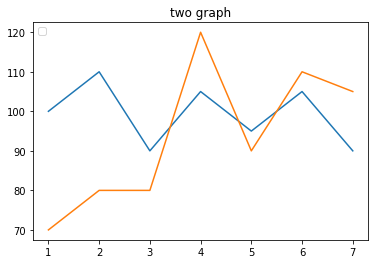

In [46]:
plt.title('two graph')
plt.plot(x, st1)
plt.plot(x, st2)
plt.legend(loc=2)

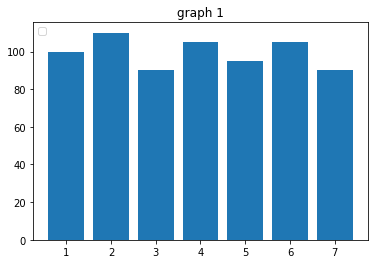

In [47]:
plt.title('graph 1')
plt.bar(x, st1)
plt.legend(loc=2)

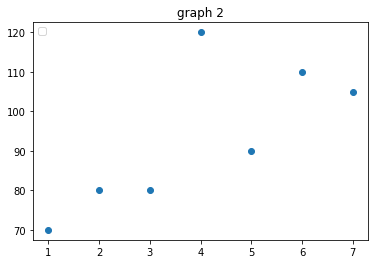

In [48]:
plt.title('graph 2')
plt.scatter(x, st2)
plt.legend(loc=2)